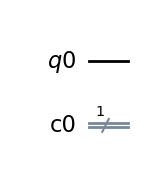

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.draw('mpl')


In [2]:
from qiskit.quantum_info import Statevector

psi1 = Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

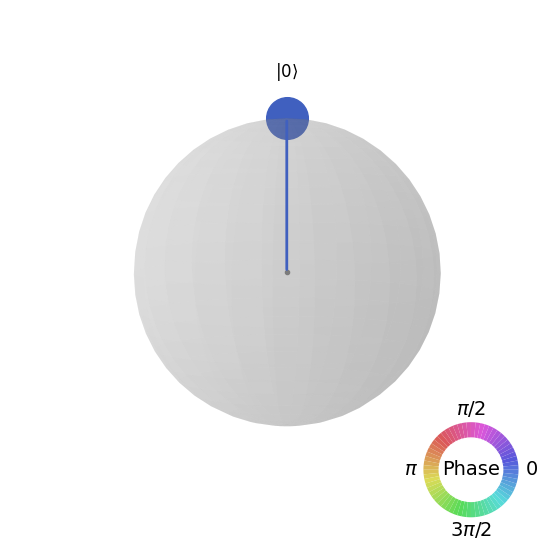

In [3]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(qc)

In [4]:
from qiskit.quantum_info import DensityMatrix

rho1 = DensityMatrix(qc)
rho1.draw('latex',prefix='\\rho_1 = ')

<IPython.core.display.Latex object>

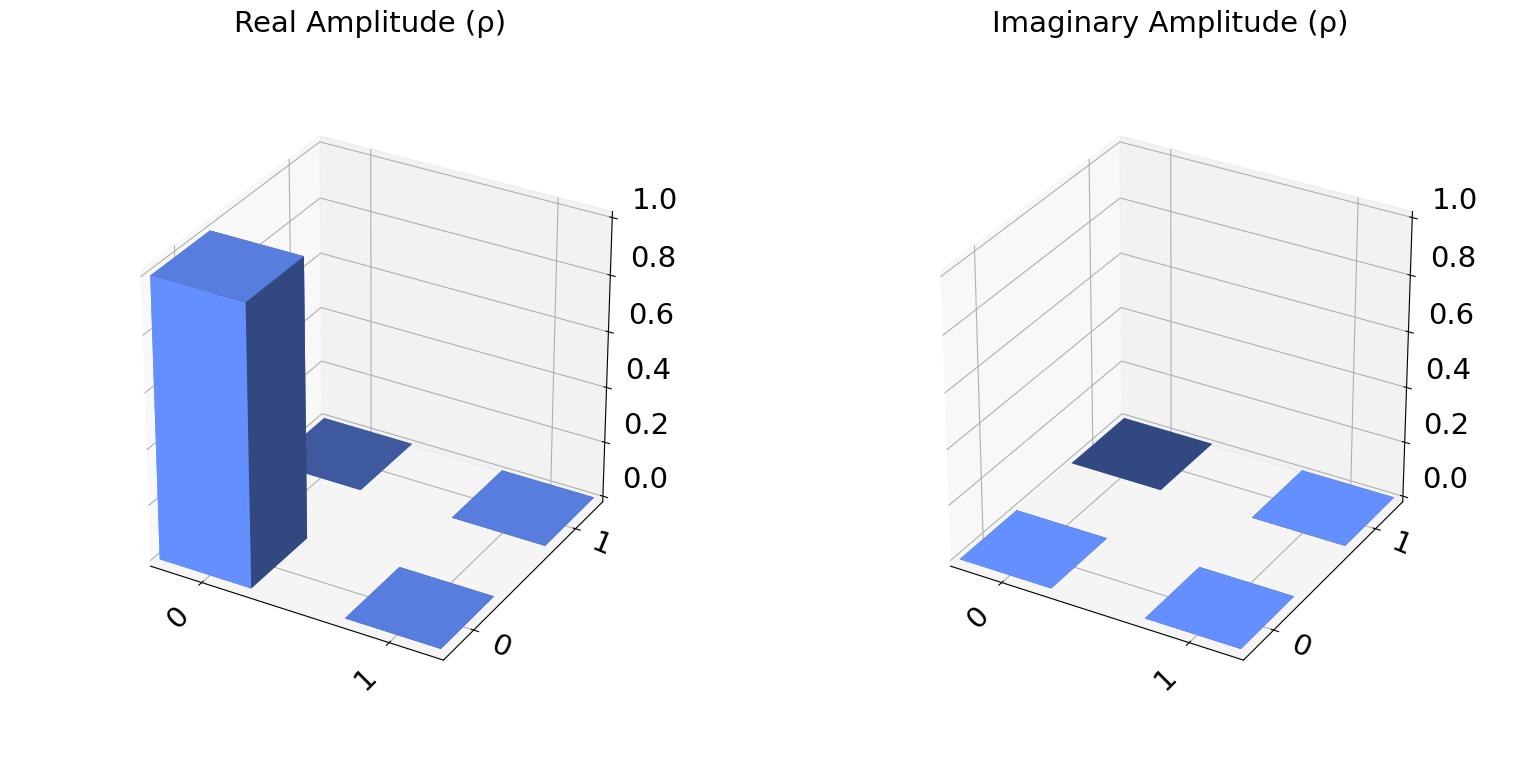

In [5]:
from qiskit.visualization import plot_state_city

plot_state_city(qc)

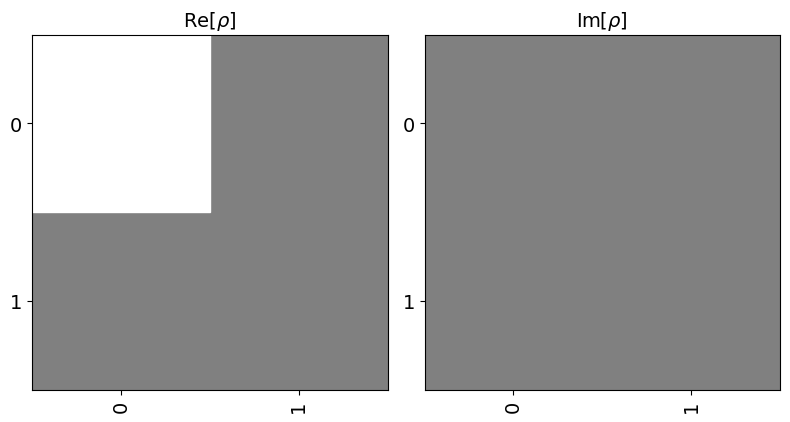

In [6]:
from qiskit.visualization import plot_state_hinton

plot_state_hinton(qc)

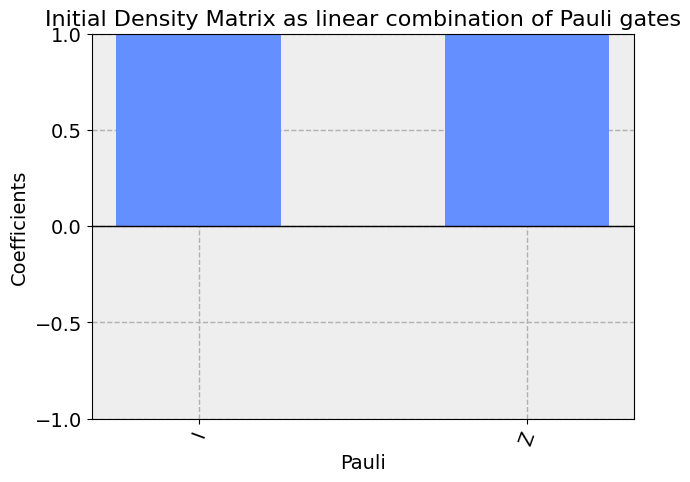

In [7]:
from qiskit.visualization import plot_state_paulivec

plot_state_paulivec(qc,title='Initial Density Matrix as linear combination of Pauli gates')

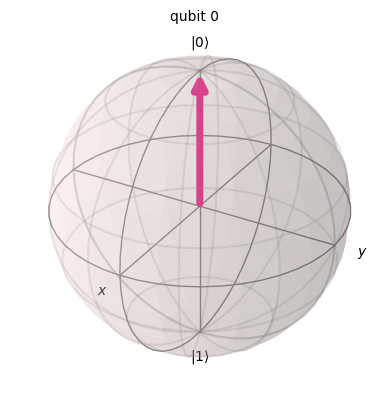

In [8]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(qc)

In [9]:
purity = rho1.purity()

print(purity)

(1+0j)


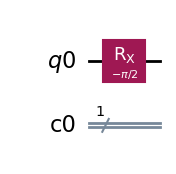

In [10]:
from math import pi

qc.rx(-pi/2, q[0])
qc.draw('mpl')

In [11]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

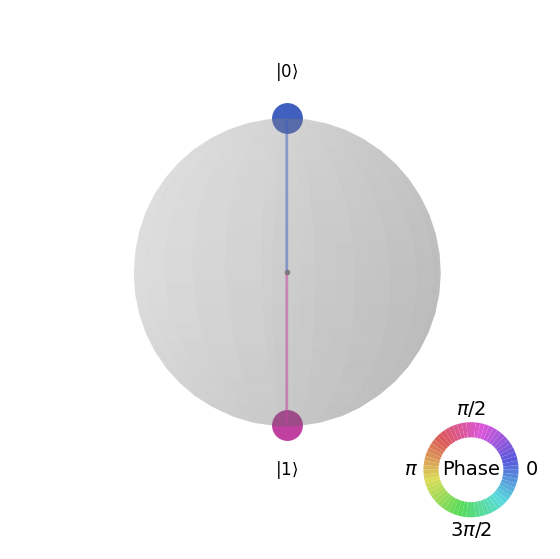

In [12]:
plot_state_qsphere(qc)

In [13]:
rho2 = DensityMatrix(qc)
rho2.draw('latex',prefix='\\rho_2=')

<IPython.core.display.Latex object>

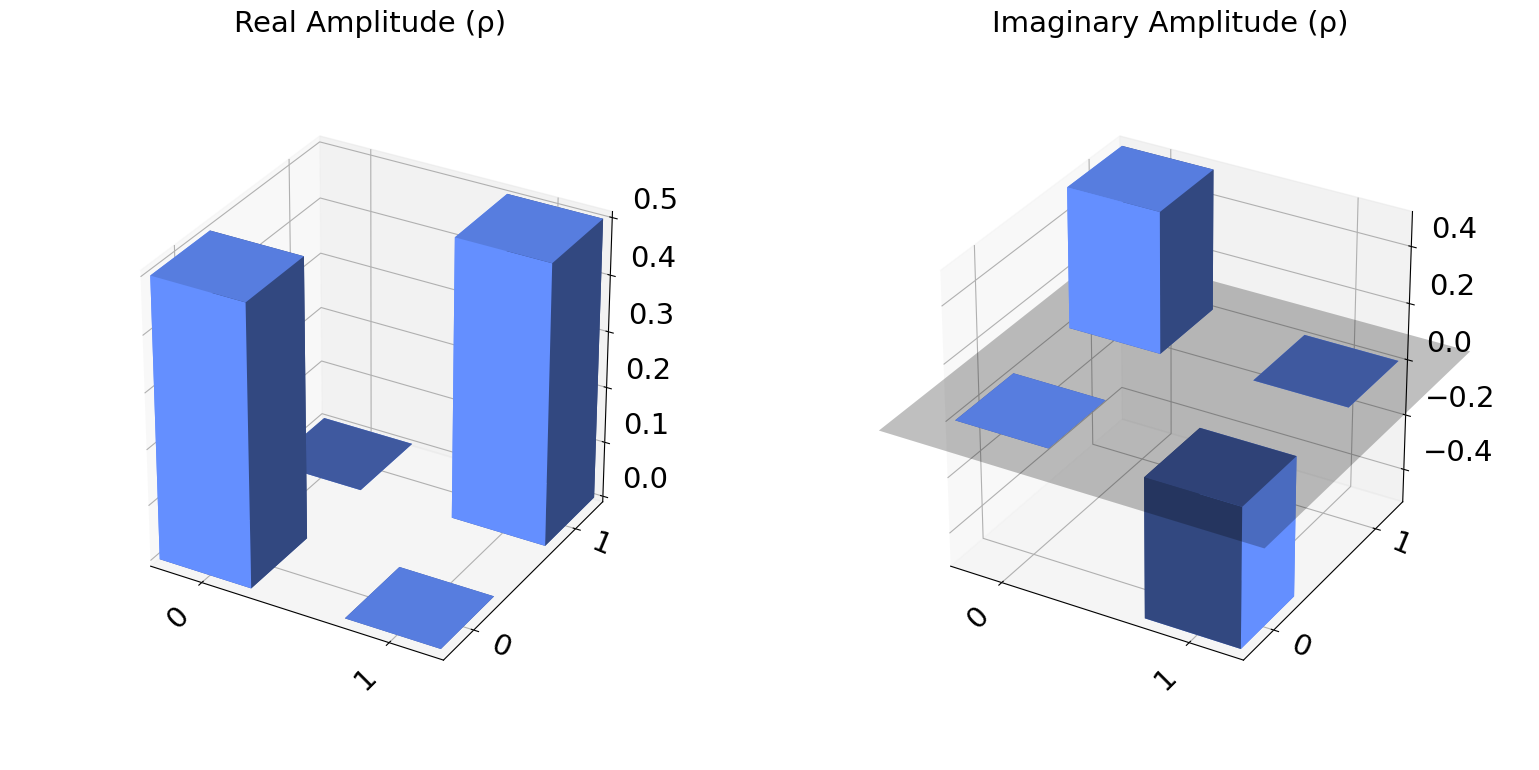

In [14]:
plot_state_city(qc)

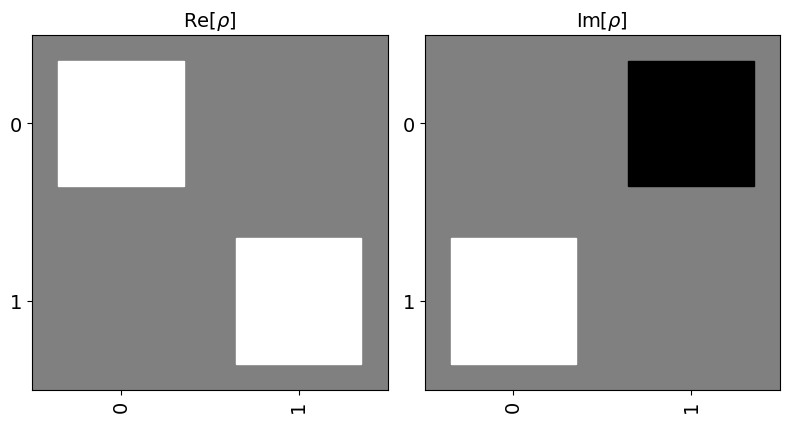

In [15]:
plot_state_hinton(qc)

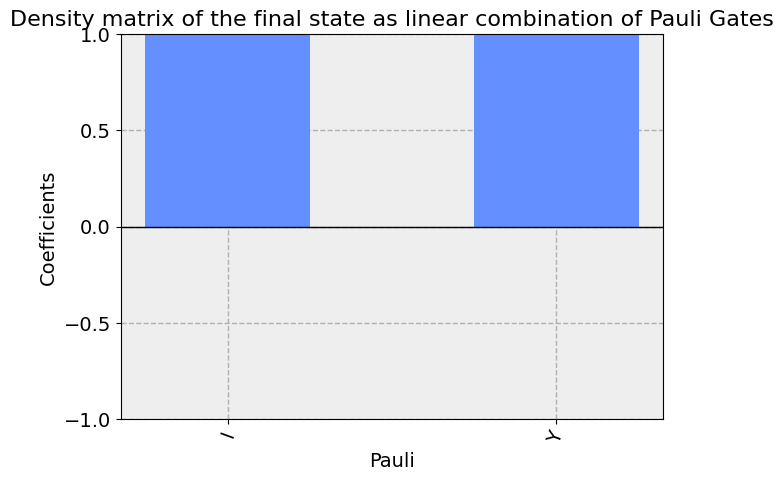

In [16]:
plot_state_paulivec(qc, title = 'Density matrix of the final state as linear combination of Pauli Gates')

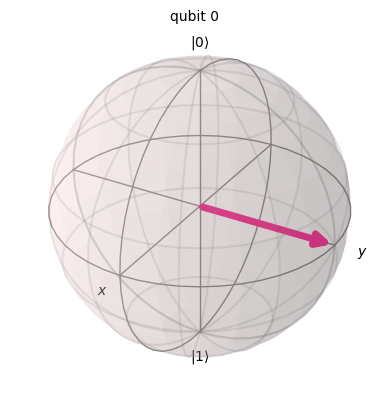

In [17]:
plot_bloch_multivector(qc)

In [18]:
from qiskit.quantum_info import state_fidelity

purity = rho2.purity()
print('purity: ', purity)

fidelity = state_fidelity(psi1,psi2)
print('psi_fidelity: ', fidelity)

fidelity = state_fidelity(rho1,rho2)
print('rho_fidelity: ', fidelity)

purity:  (1.0000000000000004+0j)
psi_fidelity:  0.5000000000000001
rho_fidelity:  0.5000000000000006


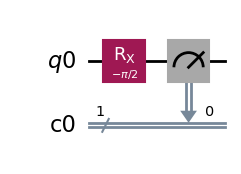

In [19]:
qc.measure(q[0],c[0])
qc.draw('mpl')

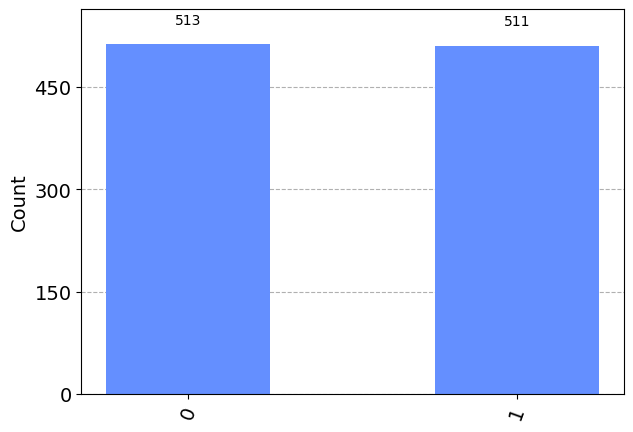

In [20]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
